### CS102: Machine learning
<b>Regression using numpy (with pandas and pyplot)<br>
<b>Classification using scikit-learn (with pandas)<br>
<b>Clustering using scikit-learn (with pandas and pyplot)</b>

In [4]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cluster

In [5]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

In [6]:
# Read Cities.csv into dataframe
f = open('Cities.csv','rU')
cities = pd.read_csv(f)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


### Regression

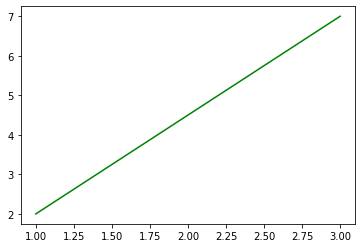

In [7]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

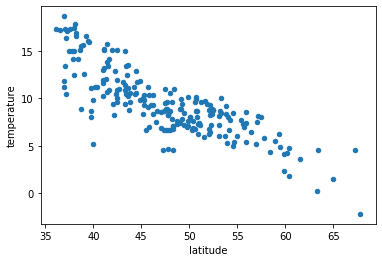

In [8]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

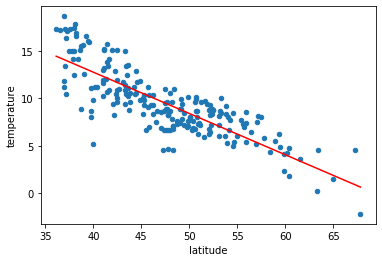

In [9]:
# Add linear regression
cities.plot.scatter(x='latitude', y='temperature')
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
x1 = min(cities.latitude)
x2 = max(cities.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [11]:
# Correlation coefficients (r values)
cc = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print ('Correlation coefficient for temperature versus latitude:', cc)
cc = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print ('Correlation coefficient for temperature versus longitude:', cc)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


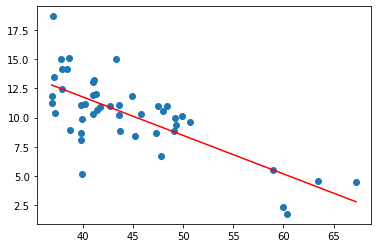

Enter city name (or "quit" to quit): Bari
Predicted temperature: 11.392554783755529
Actual temperature: 15.15
Enter city name (or "quit" to quit): Bari
Predicted temperature: 11.392554783755529
Actual temperature: 15.15
Enter city name (or "quit" to quit): Bari
Predicted temperature: 11.392554783755529
Actual temperature: 15.15


In [ ]:
# Use linear regression for interactive temperature predictor
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')]
# Compute and show regression
plt.scatter(train.latitude, train.temperature)
a,b = np.polyfit(train.latitude, train.temperature, 1)
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities.city == name]
    if len(city) == 0:
        print ('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print ('Predicted temperature:', a * float(city.latitude) + b)
        print ('Actual temperature:', float(city.temperature))

### Prepare Cities data for classification

In [11]:
# Add column to Cities with temperature category
# Note: For a dataframe D and integer i, D.loc[i] is the i-th row of D
f = open('Cities.csv','rU')
cities = pd.read_csv(f)
cats = []
for i in range(len(cities)):
    if cities.loc[i]['temperature'] < 5:
        cats.append('cold')
    elif cities.loc[i]['temperature'] < 9:
        cats.append('cool')
    elif cities.loc[i]['temperature'] < 15:
        cats.append('warm')
    else: cats.append('hot')
cities['category'] = cats
print "cold:", len(cities[(cities.category == 'cold')])
print "cool:", len(cities[(cities.category == 'cool')])
print "warm:", len(cities[(cities.category == 'warm')])
print "hot:", len(cities[(cities.category == 'hot')])

cold: 17
cool: 92
warm: 79
hot: 25


In [12]:
# Create training and test sets
numitems = len(cities)
percenttrain = 0.85
numtrain = int(numitems*percenttrain)
numtest = numitems - numtrain
print 'Training set', numtrain, 'items'
print'Test set', numtest, 'items'
citiesTrain = cities[0:numtrain]
citiesTest = cities[numtrain:]

Training set 181 items
Test set 32 items


### K-nearest-neighbors classification

In [26]:
# Predict temperature category from other features
features = ['longitude', 'latitude']
neighbors = 5
classifier = KNeighborsClassifier(neighbors)
classifier.fit(citiesTrain[features], citiesTrain['category'])
predictions = classifier.predict(citiesTest[features])
# Calculate accuracy
numtrain = len(citiesTrain)
numtest = len(citiesTest)
correct = 0
for i in range(numtest):
    #print 'Predicted:', predictions[i], ' Actual:', citiesTest.loc[numtrain+i]['category']
    if predictions[i] == citiesTest.loc[numtrain+i]['category']: correct +=1
print 'Accuracy:', float(correct)/float(numtest)
# Comment out print, try different values for neighbors, different features

Accuracy: 0.84375


### Decision tree classification

In [27]:
# Predict temperature category from other features
features = ['longitude','latitude']
split = 10
dt = DecisionTreeClassifier(random_state=0, min_samples_split=split) # split parameter is optional
dt.fit(citiesTrain[features], citiesTrain['category'])
predictions = dt.predict(citiesTest[features])
# Calculate accuracy
numtrain = len(citiesTrain)
numtest = len(citiesTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', citiesTest.loc[numtrain+i]['category']
    if predictions[i] == citiesTest.loc[numtrain+i]['category']: correct +=1
print 'Accuracy:', float(correct)/float(numtest)
# Try different values for split, different features

Accuracy: 0.75


### "Forest" of decision trees

In [29]:
# Predict temperature category from other features
features = ['longitude', 'latitude']
split = 10
trees = 10
rf = RandomForestClassifier(random_state=0, min_samples_split=split, n_estimators=trees)
rf.fit(citiesTrain[features], citiesTrain['category'])
predictions = rf.predict(citiesTest[features])
# Calculate accuracy
numtrain = len(citiesTrain)
numtest = len(citiesTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', citiesTest.loc[numtrain+i]['category']
    if predictions[i] == citiesTest.loc[numtrain+i]['category']: correct +=1
print 'Accuracy:', float(correct)/float(numtest)
# Try different values for split and trees, different features

Accuracy: 0.78125


### Naive Bayes classification

In [30]:
# Predict temperature category from other features
features = ['longitude', 'latitude']
nb = GaussianNB()
nb.fit(citiesTrain[features], citiesTrain['category'])
predictions = nb.predict(citiesTest[features])
# Calculate accuracy
numtrain = len(citiesTrain)
numtest = len(citiesTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', citiesTest.loc[numtrain+i]['category']
    if predictions[i] == citiesTest.loc[numtrain+i]['category']: correct +=1
print 'Accuracy:', float(correct)/float(numtest)
# Try different features

Accuracy: 0.78125


### Clustering using K-means

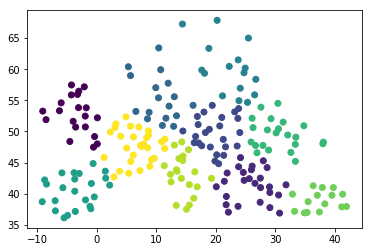

In [31]:
# K-means clustering based on longitude-latitude
kmeans = cluster.KMeans(10)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
# Try different values for K

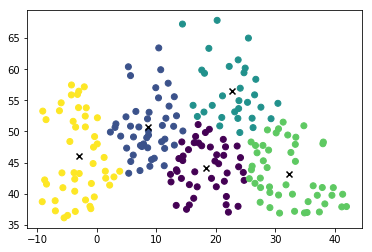

In [32]:
# Now with centroids
kmeans = cluster.KMeans(5)
kmeans.fit(cities[['longitude', 'latitude']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='black')
plt.show()

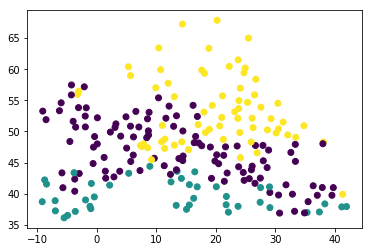

[[  9.60320755]
 [ 15.14439024]
 [  5.82090909]]


In [33]:
# K-means clustering based on temperature
kmeans = cluster.KMeans(3)
kmeans.fit(cities[['temperature']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(cities['longitude'], cities['latitude'], c=labels)
plt.show()
print centroids